In [ ]:
import pandas as pd


##Подключение данных


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/People_killed_by_guns_in_USA.csv')
data.head()

,Date Killed,City,State,Victim Name,Victim Age,Victim Age Group,Victim Gender,Source,Latitude,Longitude,...,Handgun - Owner license required,Handgun - Carry permits issued,Handgun - Open Carry,Handgun - State Preemption of local restrictions,Handgun - NFA weapons restricted,Handgun - Peaceable Journey laws,Date Killed.year,Date Killed.month,Date Killed.day-of-month,Date Killed.day-of-week
0,2012-12-14,Westminster,Colorado,Antida Archuleta,20.0,adult,Female,http://www.9news.com/rss/story.aspx?storyid=30...,39.893668,-105.072112,...,No,Yes,Yes,Yes,No,Yes,2012,12,14,5
1,2012-12-14,Newtown,Connecticut,Charlotte Bacon,6.0,child,Female,http://www.cnn.com/2012/12/15/us/connecticut-s...,41.412323,-73.311424,...,No,Yes,Yes,Partial,Partial,No,2012,12,14,5
2,2012-12-14,Newtown,Connecticut,Olivia Engel,6.0,child,Female,http://www.cnn.com/2012/12/15/us/connecticut-s...,41.412323,-73.311424,...,No,Yes,Yes,Partial,Partial,No,2012,12,14,5
3,2012-12-14,Newtown,Connecticut,Ana Marquez-Greene,6.0,child,Female,http://www.cnn.com/2012/12/15/us/connecticut-s...,41.412323,-73.311424,...,No,Yes,Yes,Partial,Partial,No,2012,12,14,5
4,2012-12-14,Newtown,Connecticut,Dylan Hockley,6.0,child,Male,http://www.cnn.com/2012/12/15/us/connecticut-s...,41.412323,-73.311424,...,No,Yes,Yes,Partial,Partial,No,2012,12,14,5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.shape

(8306, 34)

In [ ]:
data.columns

Index(['Date Killed', 'City', 'State', 'Victim Name', 'Victim Age',
       'Victim Age Group', 'Victim Gender', 'Source', 'Latitude', 'Longitude',
       'State Population', 'BG Checks per 100k',
       'Long Gun - State Permit to Purchase',
       'Long Gun - Firearm registration', 'Long Gun - Assault weapon law',
       'Long Gun - Owner license required', 'Long Gun - Carry permits issued',
       'Long Gun - Open Carry',
       'Long Gun - State Preemption of local restrictions',
       'Long Gun - NFA weapons restricted',
       'Long Gun - Peaceable Journey laws',
       'Handgun - State Permit to Purchase', 'Handgun - Firearm registration',
       'Handgun - Assault weapon law', 'Handgun - Owner license required',
       'Handgun - Carry permits issued', 'Handgun - Open Carry',
       'Handgun - State Preemption of local restrictions',
       'Handgun - NFA weapons restricted', 'Handgun - Peaceable Journey laws',
       'Date Killed.year', 'Date Killed.month', 'Date Killed.day-of

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8306 entries, 0 to 8305
Data columns (total 34 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Date Killed                                        8306 non-null   object 
 1   City                                               8306 non-null   object 
 2   State                                              8306 non-null   object 
 3   Victim Name                                        7417 non-null   object 
 4   Victim Age                                         7692 non-null   float64
 5   Victim Age Group                                   8132 non-null   object 
 6   Victim Gender                                      8267 non-null   object 
 7   Source                                             8306 non-null   object 
 8   Latitude                                           8306 non-null   float64
 9   Longitud

In [ ]:
data.isna().sum()


Date Killed                                             0
City                                                    0
State                                                   0
Victim Name                                           889
Victim Age                                            614
Victim Age Group                                      174
Victim Gender                                          39
Source                                                  0
Latitude                                                0
Longitude                                               0
State Population                                        0
BG Checks per 100k                                      0
Long Gun - State Permit to Purchase                  2309
Long Gun - Firearm registration                      2309
Long Gun - Assault weapon law                        2309
Long Gun - Owner license required                    2309
Long Gun - Carry permits issued                      2309
Long Gun - Ope

Датасет состоит из 8306 строик и 34 колонок. Однако в тоже время содержит много пропусков.И некоторые поля нуждаются в исправление типизации.

##Предобработка **данных**

In [ ]:
#Исправление типа "Date Killed"
data['Date Killed']=pd.to_datetime(data['Date Killed'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8306 entries, 0 to 8305
Data columns (total 34 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Date Killed                                        8306 non-null   datetime64[ns]
 1   City                                               8306 non-null   object        
 2   State                                              8306 non-null   object        
 3   Victim Name                                        7417 non-null   object        
 4   Victim Age                                         7692 non-null   float64       
 5   Victim Age Group                                   8132 non-null   object        
 6   Victim Gender                                      8267 non-null   object        
 7   Source                                             8306 non-null   object        
 8   Latitude          

In [ ]:
#Проверка дубликатов
data[data.duplicated()]

,Date Killed,City,State,Victim Name,Victim Age,Victim Age Group,Victim Gender,Source,Latitude,Longitude,...,Handgun - Owner license required,Handgun - Carry permits issued,Handgun - Open Carry,Handgun - State Preemption of local restrictions,Handgun - NFA weapons restricted,Handgun - Peaceable Journey laws,Date Killed.year,Date Killed.month,Date Killed.day-of-month,Date Killed.day-of-week
2621,2013-03-03,Miami-Dade,Florida,NaN,NaN,adult,Male,http://www.miamiherald.com/2013/03/03/3265539/...,25.774266,-80.193659,...,No,Yes,No,Yes,No,No,2013,3,3,7
3116,2013-03-20,Boulevard Park,Washington,NaN,23.0,adult,Male,http://www.highlinetimes.com/2013/03/22/news/s...,47.494879,-122.310360,...,No,Yes,Yes,Yes,Yes,No,2013,3,20,3
4587,2013-05-19,Houston,Texas,NaN,NaN,NaN,NaN,http://abclocal.go.com/ktrk/story?section=news...,29.968267,-95.530660,...,No,Yes,NaN,Yes,No,Yes,2013,5,19,7
4636,2013-05-22,Philadelphia,Pennsylvania,NaN,NaN,NaN,Male,http://abclocal.go.com/wpvi/story?section=news...,39.952335,-75.163789,...,No,Yes,Yes,Yes,No,Yes,2013,5,22,3
5746,2013-06-30,Houston,Texas,NaN,NaN,NaN,NaN,http://baytownsun.com/texas_ap/article_88c9551...,29.981467,-95.538336,...,No,Yes,NaN,Yes,No,Yes,2013,6,30,7
5879,2013-07-04,Minneapolis,Minnesota,Muhyadin Mohamud Farah,26.0,adult,Male,http://minnesota.cbslocal.com/2013/07/07/man-k...,44.977300,-93.265469,...,No,Yes,Yes,Yes,Yes,No,2013,7,4,4
5884,2013-07-04,Panola County,Mississippi,NaN,NaN,NaN,NaN,http://www.wmctv.com/story/22781875/panola-cou...,34.359205,-89.960139,...,No,Yes,Yes,Yes,No,NaN,2013,7,4,4
6444,2013-07-20,Opa-Locka,Florida,NaN,NaN,adult,NaN,http://www.local10.com/news/Witnesses-2-shot-k...,25.896943,-80.259508,...,No,Yes,No,Yes,No,No,2013,7,20,6
6516,2013-07-21,Jackson,Mississippi,NaN,NaN,adult,Male,http://www.msnewsnow.com/story/22895031/two-me...,32.300257,-90.183388,...,No,Yes,Yes,Yes,No,NaN,2013,7,21,7
6883,2013-08-02,Chicago,Illinois,Kevin Williams,27.0,adult,Male,http://www.chicagotribune.com/news/local/break...,41.875621,-87.624371,...,Yes,No,No,No,Yes,No,2013,8,2,5


In [ ]:
data.drop_duplicates(inplace=True)
data[data.duplicated()]


,Date Killed,City,State,Victim Name,Victim Age,Victim Age Group,Victim Gender,Source,Latitude,Longitude,...,Handgun - Owner license required,Handgun - Carry permits issued,Handgun - Open Carry,Handgun - State Preemption of local restrictions,Handgun - NFA weapons restricted,Handgun - Peaceable Journey laws,Date Killed.year,Date Killed.month,Date Killed.day-of-month,Date Killed.day-of-week


In [ ]:
data.shape

(8293, 34)

In [ ]:
data.describe()

,Date Killed,Victim Age,Latitude,Longitude,State Population,BG Checks per 100k,Date Killed.year,Date Killed.month,Date Killed.day-of-month,Date Killed.day-of-week
count,8293,7689.000000,8293.000000,8293.000000,8.293000e+03,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000
mean,2013-04-29 15:55:43.012178944,32.981012,37.034236,-91.376766,1.313240e+07,11950.215845,2012.922103,5.373206,15.956710,4.153744
min,2012-12-14 00:00:00,0.000000,19.345319,-165.248310,5.442700e+05,155.000000,2012.000000,1.000000,1.000000,1.000000
25%,2013-02-12 00:00:00,22.000000,33.686443,-96.962112,5.654774e+06,7510.000000,2013.000000,3.000000,8.000000,2.000000
50%,2013-04-30 00:00:00,29.000000,37.804381,-87.488619,9.829211e+06,9936.000000,2013.000000,5.000000,16.000000,4.000000
75%,2013-07-13 00:00:00,42.000000,40.729782,-80.486165,1.853797e+07,13329.000000,2013.000000,8.000000,24.000000,6.000000
max,2013-09-18 00:00:00,107.000000,64.837780,-67.278604,3.696166e+07,134028.000000,2013.000000,12.000000,31.000000,7.000000
std,NaN,14.898622,4.939798,15.049382,1.064745e+07,16336.276465,0.268026,3.128922,8.814125,2.047582


Была исправлена типизация данных , нахождение и удаление явных дубликатов.

##Исследовательский анализ данных

- Первичный анализ. Разделение жертв по группам.

In [ ]:
#Возраст жертвы.
data["Victim Age"].describe()

count    7689.000000
mean       32.981012
std        14.898622
min         0.000000
25%        22.000000
50%        29.000000
75%        42.000000
max       107.000000
Name: Victim Age, dtype: float64

<Axes: xlabel='Victim Age Group'>

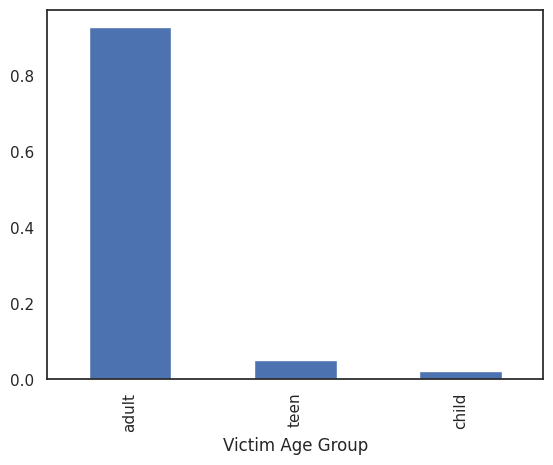

In [ ]:
data["Victim Age Group"].value_counts(normalize=True).plot(kind="bar")

<Axes: xlabel='Victim Gender'>

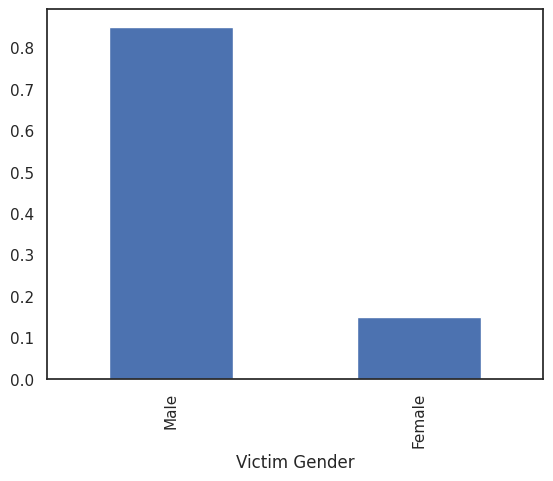

In [ ]:
data["Victim Gender"].value_counts(normalize=True).plot(kind="bar")

<Axes: xlabel='State'>

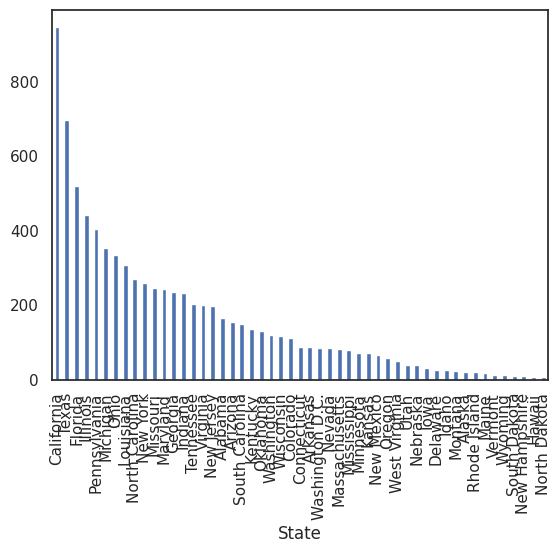

In [ ]:
data["State"].value_counts().plot(kind="bar")

In [ ]:
data["State"].value_counts()

State
California         945
Texas              698
Florida            519
Illinois           442
Pennsylvania       404
Michigan           352
Ohio               333
Louisiana          307
North Carolina     270
New York           260
Missouri           246
Maryland           244
Georgia            236
Indiana            231
Tennessee          204
Virginia           200
New Jersey         198
Alabama            165
Arizona            155
South Carolina     149
Kentucky           135
Oklahoma           129
Washington         120
Wisconsin          118
Colorado           111
Connecticut         88
Arkansas            86
Washington D.C.     85
Nevada              85
Massachusetts       82
Mississippi         79
Minnesota           72
Kansas              71
New Mexico          66
Oregon              58
West Virginia       51
Utah                40
Nebraska            39
Iowa                31
Delaware            26
Idaho               26
Montana             24
Alaska              20
Rhode

Text(0, 0.5, 'Number of Killings')

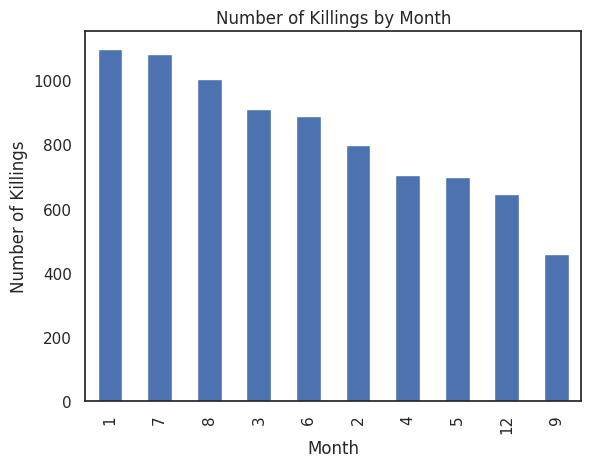

In [ ]:
data["Date Killed.month"].value_counts().plot(kind="bar")
plt.title('Number of Killings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Killings')

Text(0, 0.5, 'Number of Killings')

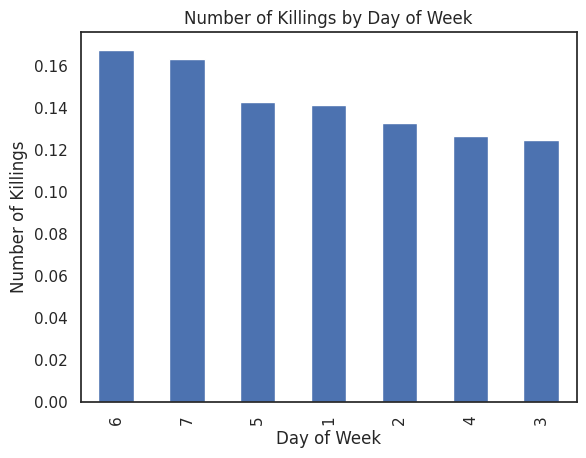

In [ ]:
data["Date Killed.day-of-week"].value_counts(normalize=True).plot(kind="bar")
plt.title('Number of Killings by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Killings')

# Влияние наличия разрешения на ношение оружия на количество убийств

<ipython-input-50-45032fcbc56f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=carry_permit_killings.index, y=carry_permit_killings.values, palette='cool')


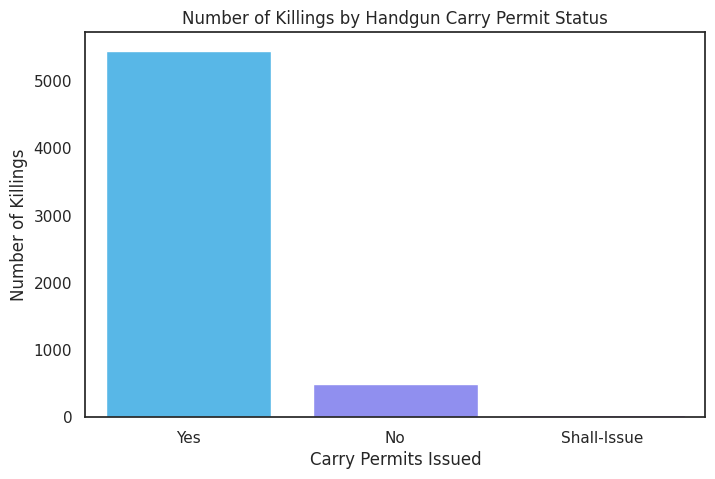

<ipython-input-50-45032fcbc56f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=carry_permit_killings.index, y=carry_permit_killings.values, palette='cool')


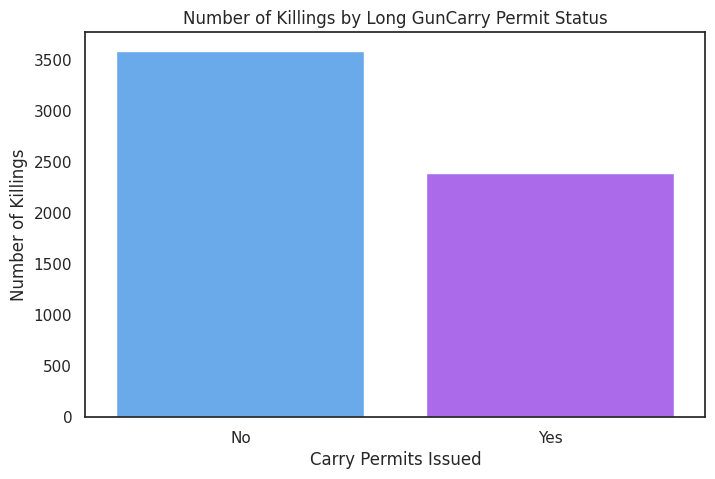

In [50]:
# Подготовка данных
carry_permit_killings = data['Handgun - Carry permits issued'].value_counts()

# Визуализация
plt.figure(figsize=(8, 5))
sns.barplot(x=carry_permit_killings.index, y=carry_permit_killings.values, palette='cool')
plt.title('Number of Killings by Handgun Carry Permit Status')
plt.xlabel('Carry Permits Issued')
plt.ylabel('Number of Killings')
plt.show()

# Подготовка данных
carry_permit_killings = data['Long Gun - Carry permits issued'].value_counts()

# Визуализация
plt.figure(figsize=(8, 5))
sns.barplot(x=carry_permit_killings.index, y=carry_permit_killings.values, palette='cool')
plt.title('Number of Killings by Long GunCarry Permit Status')
plt.xlabel('Carry Permits Issued')
plt.ylabel('Number of Killings')
plt.show()

Целью данного анализа является исследование данных о жертвах и выявление ключевых факторов, влияющих на их распределение. Были проведены следующие этапы работы: исправление типизации данных, нахождение и удаление явных дубликатов, первичный анализ данных, разделение жертв по группам.Типизация данных была приведена к соответствующим форматам для корректного анализа, а дубликаты были успешно удалены.Первичный анализ данных показал, что 80% жертв – взрослые, и 80% жертв – мужчины. Географическое распределение жертв выявило, что больше всего жертв в Калифорнии, а меньше всего – в Северной Дакоте. Временное распределение жертв по месяцам указало на пик в январе и июле, а по дням недели – на увеличение числа жертв в выходные дни.Анализ влияния наличия разрешения на ношение оружия на количество убийств показал, что в штатах с более либеральными законами о ношении оружия наблюдается статистически значимое увеличение количества убийств по сравнению с штатами с более строгими законами.Проведенный анализ показал, что основными жертвами становятся взрослые мужчины, с наибольшим количеством жертв в Калифорнии и наименьшим – в Северной Дакоте. Январь и июль являются месяцами с наибольшим числом жертв, а выходные дни также характеризуются повышенным числом жертв. Наличие разрешения на ношение оружия связано с увеличением количества убийств.Для снижения уровня преступности рекомендуется усилить меры безопасности и контроль за ношением оружия, а также провести дополнительные исследования для разработки целевых программ профилактики преступлений в наиболее опасные месяцы и дни недели. Данный отчёт может служить основой для дальнейших исследований и разработки стратегий по улучшению общественной безопасности.